## 1.- Importar librerías

In [132]:
import os, glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import ticker

In [133]:
os.listdir()
"vamo"

'vamo'

## 2.- Obtener archivos

In [134]:
files_total_ent = glob.glob('agrupados/total_estatal/*.csv')
files_total_mun = glob.glob('agrupados/total_mun/*.csv')
files_fuentes_ent = glob.glob('agrupados/fuentes_gral/*_ent/*.csv')
files_fuentes_mun = glob.glob('agrupados/fuentes_gral/*_mun/*.csv')
file_fuentes_ent = glob.glob('agrupados/fuentes_gral/*.csv')
file_fuentes_ent

['agrupados/fuentes_gral\\INEM-2005-Fuente-entidades.csv']

In [135]:
renameCols = {
    "Entidad Fed.":"nom_ent",
    "ESTADO":"nom_ent",
    "ESTADO":"nom_ent",
    "cve.edo.":"cve_ent",
    "cvemun":"cve_mun",
    "cveedo":"cve_ent",
    "cveestado":"cve_ent",
    "cvemunicipio":"cve_mun",
    "estado":"nom_ent",
    "cvedeestado":"cve_ent",
    "municipio":"nom_mun",
    "cvedemunicipio":"cve_mun",
    "pm25":"pm2.5",
    "año":"year",
    "Añño":"year",
    "entidadfed.":"nom_ent",
    'municipioodeleg.': 'nom_mun',
}

emisiones = ['pm10', 'pm2.5',  'co', 'nox', 'cov', 'nh3','so2']

In [136]:
estados_rename = {
  'Coahuila De Zaragoza': 'Coahuila',
  'Michoacan De Ocampo': 'Michoacán',
  'Michoacán De Ocampo': 'Michoacán',
  'Michoacan':'Michoacán',
  'Mexico': 'México',
  'Nuevo Leon': 'Nuevo León',
  'Queretaro Arteaga': 'Querétaro',
  'Queretaro': 'Querétaro',
  'San Luis Potosi':'San Luis Potosí',
  'Veracruz De Ignacio De La Llave': 'Veracruz',
  'Yucatan': 'Yucatán',
  'Distrito Federal': 'Ciudad de México',
  'Ciudad De México': 'Ciudad de México',
}

estados = [
  'Aguascalientes',
  'Baja California',
  'Baja California Sur',
  'Campeche',
  'Chiapas',
  'Chihuahua',
  'Ciudad de México',
  'Coahuila',
  'Colima',
  'Durango',
  'Guanajuato',
  'Guerrero',
  'Hidalgo',
  'Jalisco',
  'Michoacán',
  'Morelos',
  'México',
  'Nayarit',
  'Nuevo León',
  'Oaxaca',
  'Puebla',
  'Querétaro',
  'Quintana Roo',
  'San Luis Potosí',
  'Sinaloa',
  'Sonora',
  'Tabasco',
  'Tamaulipas',
  'Tlaxcala',
  'Veracruz',
  'Yucatán',
  'Zacatecas'
]


len(estados)

32

In [137]:
def readAppendSectoresFiles(files):
  df = pd.DataFrame()
  
  for f in files:
    
    try:
      dfi = pd.read_csv(f)
      
    except UnicodeDecodeError:
      dfi = pd.read_csv(f, encoding="latin1") 
      
    fuente = f.split("-")[3]
    year = f.split("-")[1]
    dfi["fuente"] = fuente
    dfi["year"] = year
    
    ## remove empty spaces in column names
    dfi.columns = dfi.columns.str.replace(" ", "")
    
    ## lowercase column names
    dfi.columns = dfi.columns.str.lower()
    
    dfi.rename(columns=renameCols, inplace=True)
    df = pd.concat([df, dfi])
    
    
  # make columns emisiones to float64
  for e in ['pm10', 'pm2.5', 'so2', 'co', 'nox', 'cov', 'nh3']:
    #dfi[e] = dfi[e].str.replace(",", "")
    df[e] = df[e].astype("float64")
    
    
  return df

#colStateTotal = ['nom_ent', 'year', 'pm10', 'pm2.5', 'so2', 'co', 'nox', 'cov', 'nh3']
def readAppendTotalFiles(files):
  df = pd.DataFrame()

  for f in files:
    
    year = f.split("-")[1]
    tipo = f.split("-")[-1]
    
    try:
      
      dfi = pd.read_csv(f)
      
    except:
      
      dfi = pd.read_csv(f, encoding="latin1") 
      
    # keep only first 32 rows
    #dfi = dfi.iloc[:32]
       
    # if year = "2005", remove "Municipio" column
    if year == "2005" and tipo ==  "municipal.csv":
      dfi.drop(columns=["Municipio"], inplace=True)   
    
    ## remove empty spaces in column names
    dfi.columns = dfi.columns.str.replace(" ", "")
    
    ## lowercase column names
    dfi.columns = dfi.columns.str.lower()
    dfi.rename(columns=renameCols, inplace=True)
  
    dfi["year"] = year
    

    
 
    for e in ['pm10', 'pm2.5','so2', 'co', 'nox', 'cov', 'nh3']:
      # check if column is type string
      if dfi[e].dtype != "object":
        continue
      
      # remove "," in values
      dfi[e] = dfi[e].str.replace(",", "")
        
      dfi[e] = dfi[e].astype("float64")

    #dfi = dfi[colStateTotal]
    df = pd.concat([df, dfi])
    
  return df



## Fuentes estatal municipal

In [138]:
fuentes_entidad_2005 = pd.read_csv(file_fuentes_ent[0])
## remove empty spaces in column names
fuentes_entidad_2005.columns = fuentes_entidad_2005.columns.str.replace(" ", "")
    
## lowercase column names
fuentes_entidad_2005.columns = fuentes_entidad_2005.columns.str.lower()
fuentes_entidad_2005.rename(columns=renameCols, inplace=True)
# make columns emisiones to float64
for e in ['pm10', 'pm2.5', 'so2', 'co', 'nox', 'cov', 'nh3']:
  fuentes_entidad_2005[e] = fuentes_entidad_2005[e].str.replace(",", "")
  fuentes_entidad_2005[e] = fuentes_entidad_2005[e].astype("float64")
  
fuentes_entidad_2005.head()

,year,fuente,cve_ent,nom_ent,pm10,pm2.5,so2,co,nox,cov,nh3
0,2005,AREA,1.0,AGUASCALIENTES,4159.26,2921.86,4184.56,20816.05,3477.93,19337.84,20899.68
1,2005,AREA,2.0,BAJA CALIFORNIA,11663.15,8612.71,16784.09,75208.42,12350.39,52375.69,12162.86
2,2005,AREA,3.0,BAJA CALIFORNIA SUR,4024.20,3034.90,1793.27,22071.83,2698.27,11472.82,3215.62
3,2005,AREA,4.0,CAMPECHE,6654.25,4873.10,1992.62,36258.78,3559.64,15777.77,10900.75
4,2005,AREA,5.0,COAHUILA,9489.41,6094.22,13293.27,38034.03,12457.83,46581.64,18073.55


In [139]:
fuentes_ent = readAppendSectoresFiles(files_fuentes_ent)
fuentes_ent = pd.concat([ fuentes_entidad_2005, fuentes_ent])
fuentes_ent = pd.melt(fuentes_ent, id_vars=["nom_ent", "cve_ent", "fuente", "year"], value_vars=emisiones, var_name="emision", value_name="emisiones")
fuentes_ent["nom_ent"] = fuentes_ent["nom_ent"].str.title()
fuentes_ent["nom_ent"] = fuentes_ent["nom_ent"].replace(estados_rename)

# keep only states in estados list
fuentes_ent = fuentes_ent[fuentes_ent["nom_ent"].isin(estados)]



fuentes_mun = readAppendSectoresFiles(files_fuentes_mun)
fuentes_mun = pd.melt(fuentes_mun, id_vars=["nom_ent", "cve_ent", "nom_mun", "cve_mun", "fuente", "year"], value_vars=emisiones, var_name="emision", value_name="emisiones")
fuentes_mun["nom_ent"] = fuentes_mun["nom_ent"].str.title()
fuentes_mun["nom_ent"] = fuentes_mun["nom_ent"].replace(estados_rename)

# keep only states in estados list
fuentes_mun = fuentes_mun[fuentes_mun["nom_ent"].isin(estados)]

fuentes_ent.head()

,nom_ent,cve_ent,fuente,year,emision,emisiones
0,Aguascalientes,1.0,AREA,2005,pm10,4159.26
1,Baja California,2.0,AREA,2005,pm10,11663.15
2,Baja California Sur,3.0,AREA,2005,pm10,4024.20
3,Campeche,4.0,AREA,2005,pm10,6654.25
4,Coahuila,5.0,AREA,2005,pm10,9489.41


In [140]:
fuentes_mun.head()

,nom_ent,cve_ent,nom_mun,cve_mun,fuente,year,emision,emisiones
0,Aguascalientes,1,Aguascalientes,1.0,area,2008,pm10,1154.287483
1,Aguascalientes,1,Asientos,2.0,area,2008,pm10,261.230143
2,Aguascalientes,1,Calvillo,3.0,area,2008,pm10,268.989001
3,Aguascalientes,1,Cosio,4.0,area,2008,pm10,92.818156
4,Aguascalientes,1,Jesus Maria,5.0,area,2008,pm10,431.452577


## Total estatal municipal

In [141]:
files_total_ent

['agrupados/total_estatal\\INEM-2005-Total-estatal.csv',
 'agrupados/total_estatal\\INEM-2008-Total-estatal.csv',
 'agrupados/total_estatal\\INEM-2013-Total-estatal.csv',
 'agrupados/total_estatal\\INEM-2016-Total-estatal.csv']

In [142]:
total_ent = readAppendTotalFiles(files_total_ent)
total_ent = pd.melt(total_ent, id_vars=["nom_ent",  "year"], value_vars=emisiones, var_name="emision", value_name="emisiones")
# make nom_ent to title
total_ent["nom_ent"] = total_ent["nom_ent"].str.title()
total_ent["nom_ent"] = total_ent["nom_ent"].replace(estados_rename)

# keep only states in estados list
total_ent = total_ent[total_ent["nom_ent"].isin(estados)]

total_mun = readAppendTotalFiles(files_total_mun)
print(total_mun.columns)
total_mun = pd.melt(total_mun, id_vars=["nom_ent", "nom_mun", "year"], value_vars=emisiones, var_name="emision", value_name="emisiones")
total_mun["nom_ent"] = total_mun["nom_ent"].str.title()
total_mun["nom_ent"] = total_mun["nom_ent"].replace(estados_rename)
# keep only states in estados list
total_mun = total_mun[total_mun["nom_ent"].isin(estados)]

total_mun

Index(['year', 'cve_ent', 'nom_ent', 'nom_mun', 'pm10', 'pm2.5', 'so2', 'co',
       'nox', 'cov', 'nh3', 'cve_mun'],
      dtype='object')


,nom_ent,nom_mun,year,emision,emisiones
0,Aguascalientes,Aguascalientes,2005,pm10,1989.630000
1,Aguascalientes,Asientos,2005,pm10,356.040000
2,Aguascalientes,Calvillo,2005,pm10,302.590000
3,Aguascalientes,Cosío,2005,pm10,117.070000
4,Aguascalientes,Jesús María,2005,pm10,768.540000
...,...,...,...,...,...
68851,Zacatecas,Villa Hidalgo,2016,so2,6.905418
68852,Zacatecas,Villanueva,2016,so2,36.795375
68853,Zacatecas,Zacatecas,2016,so2,166.354152
68854,Zacatecas,Trancoso,2016,so2,7.043843


## Graficos

## Configuración de gráficos

In [161]:
alpha = 1
colormap = "Set3"

### Fuentes estatal municipal

In [143]:
total_ent

,nom_ent,year,emision,emisiones
0,Aguascalientes,2005,pm10,5371.110000
1,Baja California,2005,pm10,15182.240000
2,Baja California Sur,2005,pm10,7098.980000
3,Campeche,2005,pm10,9436.440000
4,Coahuila,2005,pm10,32337.540000
...,...,...,...,...
979,Tamaulipas,2016,so2,123455.567100
980,Tlaxcala,2016,so2,1632.835523
981,Veracruz,2016,so2,223703.853900
982,Yucatán,2016,so2,20858.908880


In [144]:
df = total_ent[total_ent["year"] == '2005']
df = df.pivot_table("emisiones","emision", "nom_ent", aggfunc="sum")
df

nom_ent,Aguascalientes,Baja California,Baja California Sur,Campeche,Chiapas,Chihuahua,Ciudad de México,Coahuila,Colima,Durango,...,Quintana Roo,San Luis Potosí,Sinaloa,Sonora,Tabasco,Tamaulipas,Tlaxcala,Veracruz,Yucatán,Zacatecas
emision,,,,,,,,,,,,,,,,,,,,,
co,657084.03,3523878.38,361685.43,223467.88,510861.89,2005178.28,1250648.89,621957.46,335903.22,642374.79,...,394088.69,766905.91,691017.33,586645.51,618356.27,1674962.85,378127.79,1447992.13,696295.63,1055125.20
cov,91052.46,362535.56,122790.97,1762958.51,1577392.58,592972.54,266337.89,215911.58,134108.13,155244.49,...,1667919.94,342811.93,807340.96,728345.50,317704.38,716544.30,53126.14,870347.15,1315901.30,260566.80
nh3,21141.23,14255.65,3516.14,11543.75,48551.87,33654.61,22102.04,29824.05,4945.61,26002.01,...,6412.70,27356.47,33759.08,33483.00,17969.80,21521.43,9912.82,73914.98,15402.07,24249.37
nox,30237.81,181539.67,53109.54,112188.06,141102.02,207849.09,218152.82,197925.23,39954.77,71062.20,...,47154.80,131687.41,145451.93,186562.36,193364.25,275731.67,21098.48,344977.60,75207.19,93721.57
pm10,5371.11,15182.24,7098.98,9436.44,38376.79,25480.41,6239.25,32337.54,12887.14,21658.01,...,9592.66,29342.44,35725.92,41548.74,17803.98,35093.93,6180.89,94492.99,15955.09,17629.66
pm2.5,3698.43,11581.48,5318.89,7331.58,28122.48,14678.10,3933.74,22406.78,9244.86,15396.82,...,7647.30,21930.03,23638.46,28745.39,15194.79,22606.27,4202.34,81624.49,9339.58,10848.68
so2,6000.12,33042.30,23237.54,728158.63,18957.13,79043.41,3327.44,253815.26,185497.64,52081.40,...,2780.52,89747.94,106776.30,110369.20,23922.70,135206.28,5118.36,307046.67,47742.71,2365.24


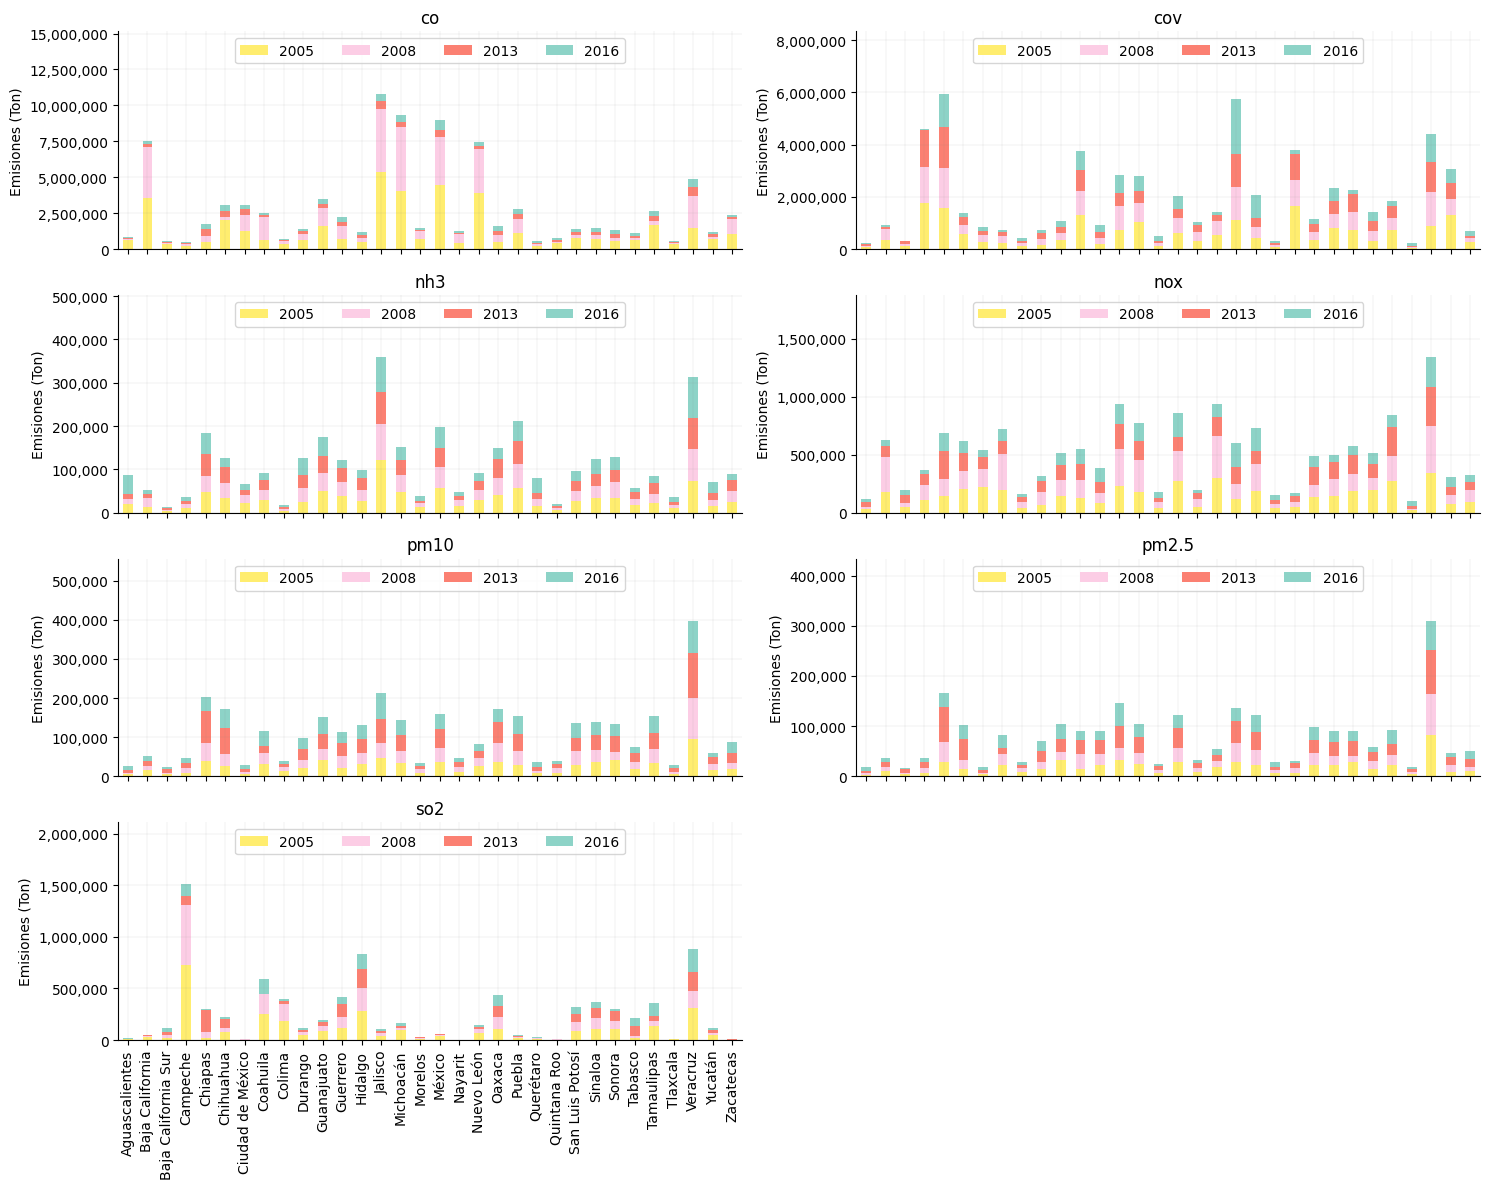

In [164]:
fig, ax = plt.subplots(figsize=(15, 12), ncols=2, nrows=4, sharex=True)

col = 0
row = 0

for emision, df in total_ent.groupby("emision"):
  
  df = df.pivot_table("emisiones","nom_ent","year", aggfunc="sum")
  
  ax[row, col].set_title(emision)
  df.plot(kind='bar', stacked=True, ax=ax[row, col],  colormap="Set3_r", alpha=1)
  
  # hide xlabel
  ax[row, col].set_xlabel("")
  
  ax[row, col].set_ylabel("Emisiones (Ton)")
  
  # set ylimit from 0 to 40% higher than max value
  ax[row, col].set_ylim(0, df.sum(axis=1).max() * 1.4)
  
  ax[row, col].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
  
  ax[row, col].legend(ncol=4, loc="upper center")
  # set a gray grid 
  ax[row, col].grid(color='gray', linestyle='-', linewidth=0.1, alpha=0.7)
  
  col += 1
  if col == 2:
    col = 0
    row += 1
fig.delaxes(ax[3,1])
sns.despine()
plt.tight_layout()
plt.savefig("img/emisiones_total_entidad_FIG1.png", dpi=300)
plt.show()


In [146]:
colima_total_mun = total_mun[total_mun["nom_ent"] == "Colima"]
colima_total_mun.head()

,nom_ent,nom_mun,year,emision,emisiones
70,Colima,Armería,2005,pm10,142.90
71,Colima,Colima,2005,pm10,792.32
72,Colima,Comala,2005,pm10,146.69
73,Colima,Coquimatlán,2005,pm10,151.73
74,Colima,Cuauhtémoc,2005,pm10,1762.26


In [147]:
colima_total_mun.pivot_table("emisiones","emision","year", aggfunc="sum")

year,2005,2008,2013,2016
emision,,,,
co,335903.22,246451.544267,53845.136525,73318.384472
cov,134108.12,94139.384765,76123.568959,101996.884631
nh3,4945.60,4611.792666,4818.393347,4370.217025
nox,39954.77,51188.238135,36389.118273,26904.538538
pm10,12887.14,11595.460384,11757.095609,8949.224690
pm2.5,9244.86,7042.879900,9132.339676,6409.431828
so2,185497.63,168482.325519,89964.178455,16763.837797


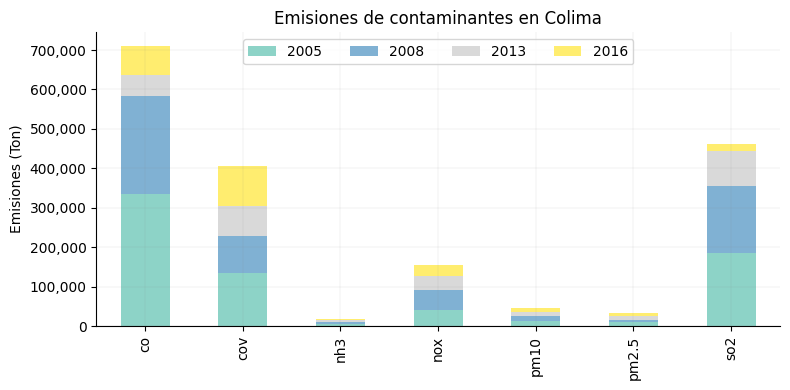

In [148]:
fig, ax = plt.subplots(figsize=(8, 4))

col = 0
row = 0



df = colima_total_mun.pivot_table("emisiones","emision","year", aggfunc="sum")

ax.set_title("Emisiones de contaminantes en Colima")
df.plot(kind='bar', stacked=True, ax=ax, colormap="Set3")

# hide xlabel
ax.set_xlabel("")

ax.set_ylabel("Emisiones (Ton)")

# make legend columns to 4 
ax.legend(ncol=4)

# set y ticks to scientific notation
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
ax.legend(ncol=4, loc="upper center")
ax.grid(color='gray', linestyle='-', linewidth=0.1, alpha=0.7)
sns.despine()
plt.tight_layout()
plt.savefig("img/emisiones_total_colima_FIG2.png", dpi=300)
plt.show()

## Separación por fuentes

In [149]:
fuentes_ent
fuentes_ent_colima = fuentes_ent[fuentes_ent["nom_ent"] == "Colima"]
fuentes_ent_colima

# Set columm "fuente" to lower case
fuentes_ent_colima["fuente"] = fuentes_ent_colima["fuente"].str.lower()

C:\Users\pedro\AppData\Local\Temp\ipykernel_24056\3242655620.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fuentes_ent_colima["fuente"] = fuentes_ent_colima["fuente"].str.lower()


In [150]:
fuentes_ent_colima.fuente.unique()

array(['area', 'fijas', 'moviles', 'naturales'], dtype=object)

In [151]:
rename_fuente = {
  'area': 'Área',
  'fijas': 'Fijas',
  'moviles': 'Móviles',
  'naturales': 'Naturales',
}

fuentes_ent_colima["fuente"] = fuentes_ent_colima["fuente"].replace(rename_fuente)

C:\Users\pedro\AppData\Local\Temp\ipykernel_24056\4167545217.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fuentes_ent_colima["fuente"] = fuentes_ent_colima["fuente"].replace(rename_fuente)


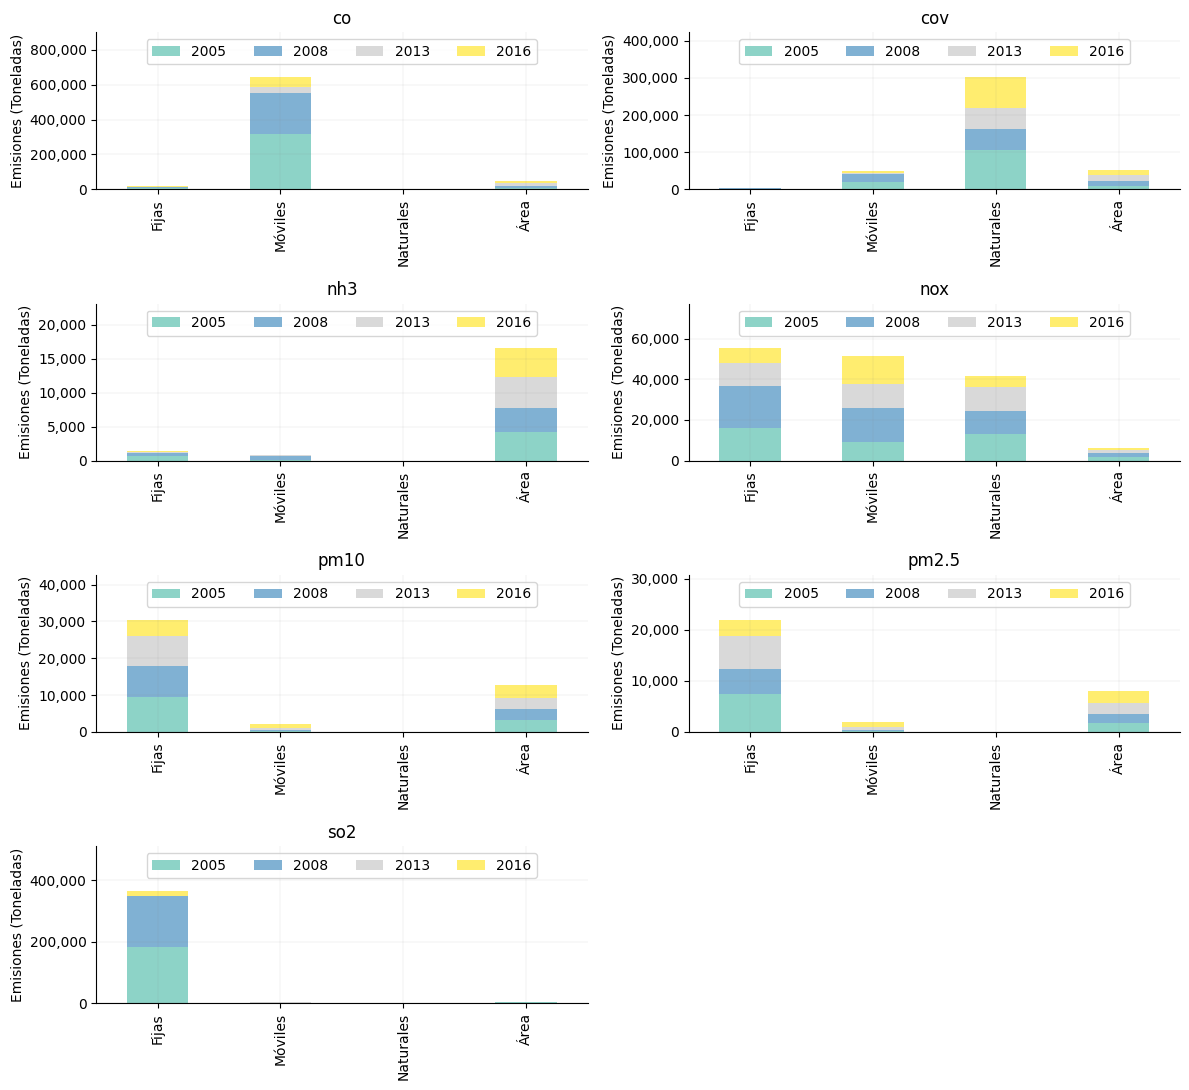

In [152]:
fig, ax = plt.subplots(figsize=(12, 11), ncols=2, nrows=4)

col = 0
row = 0

for emision, df in fuentes_ent_colima.groupby("emision"):
  
  df = df.pivot_table("emisiones","fuente","year", aggfunc="sum")
  
  ax[row, col].set_title(emision)
  df.plot(kind='bar', stacked=True, ax=ax[row, col],  colormap="Set3" )
  
  # hide xlabel
  ax[row, col].set_xlabel("")
  
  ax[row, col].set_ylabel("Emisiones (Ton)")
  
  ax[row, col].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))


  ax[row, col].grid(color='gray', linestyle='-', linewidth=0.1, alpha=0.7)
  # make legend columns to 4 and loc to "upper center"
  ax[row, col].legend(ncol=4, loc="upper center")
  
  # set ylim 10% higher than max value in "emisiones" column
  ax[row, col].set_ylim(0, df.sum(axis=1).max() * 1.40)
  
  col += 1
  if col == 2:
    col = 0
    row += 1
fig.delaxes(ax[3,1])
plt.tight_layout()
sns.despine()
plt.savefig("img/emisiones_fuentes_colima_FIG3.png", dpi=300)
plt.show()


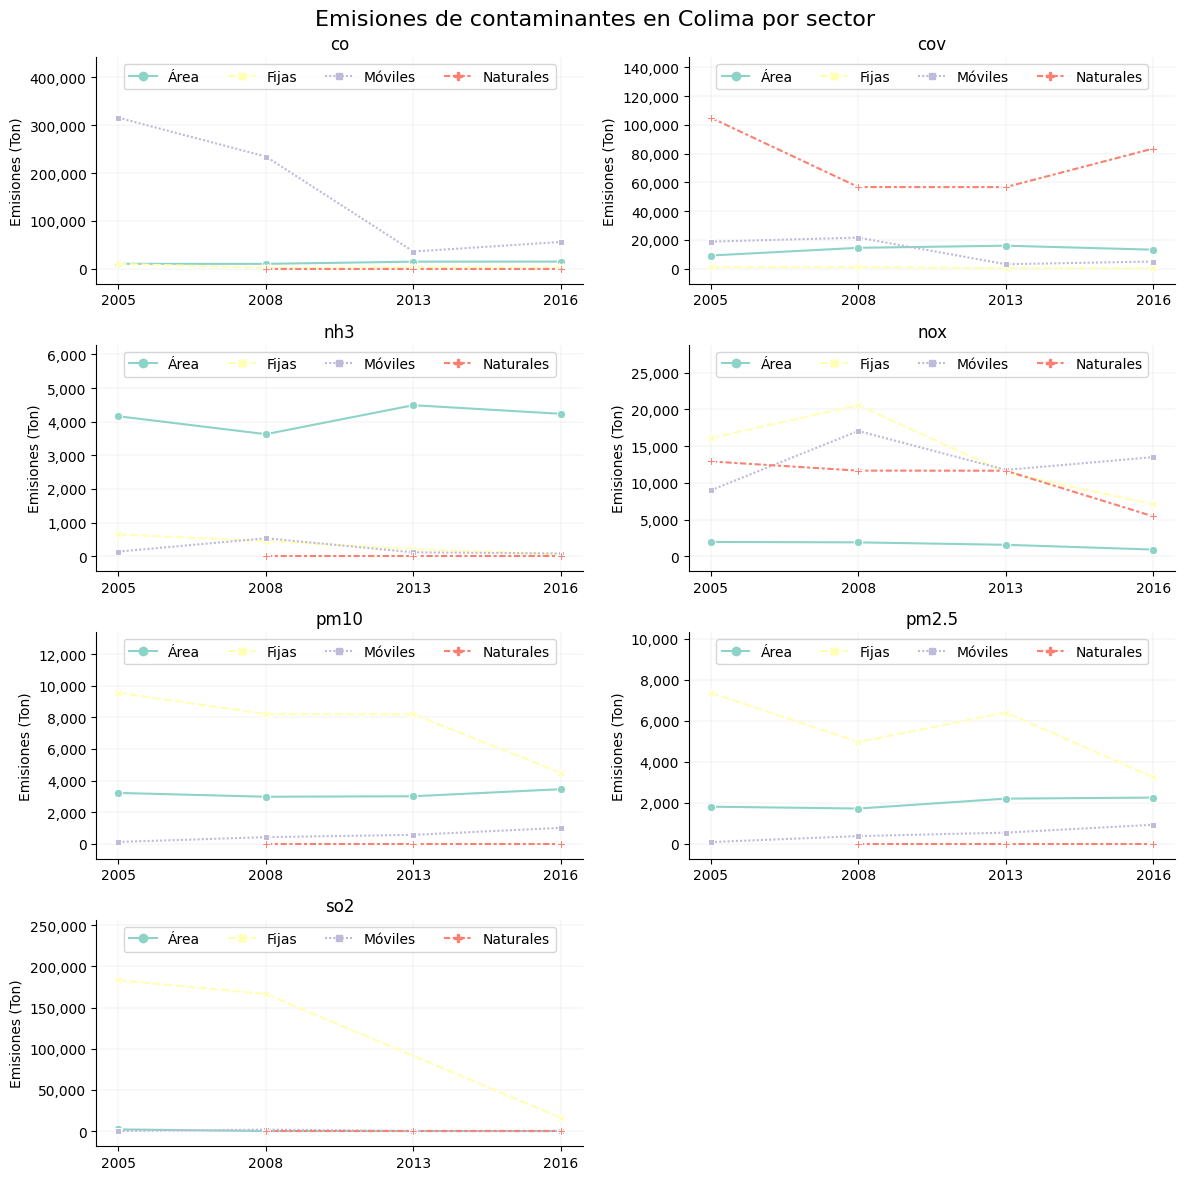

In [166]:
fig, ax = plt.subplots(figsize=(12, 12), ncols=2, nrows=4)

col = 0
row = 0

for emision, df in fuentes_ent_colima.groupby("emision"):
  
  #df = df.pivot_table("emisiones","fuente","year", aggfunc="sum")
  
  ax[row, col].set_title(emision)
  sns.lineplot(data=df, x="year", y="emisiones", hue="fuente", style="fuente", markers=True, dashes=True, ax=ax[row, col], palette="Set3", sizes=(3, 6))
  
  # hide xlabel
  ax[row, col].set_xlabel("")
  
  ax[row, col].set_ylabel("Emisiones (Ton)")
  
  ax[row, col].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

  # make legend columns to 4 and loc to "upper center"
  ax[row, col].legend(ncol=4, loc="upper center")
  
  # set ylim 10% higher than max value in "emisiones" column
  ax[row, col].set_ylim(-df["emisiones"].max() * 0.10, df["emisiones"].max() * 1.40)
  ax[row, col].grid(color='gray', linestyle='-', linewidth=0.1, alpha=0.7)
  
  # remove ax[3,1] because it's empty
  if row == 3 and col == 1:
    ax[row, col].axis("off")
    

  
  col += 1
  if col == 2:
    col = 0
    row += 1

# set title as "Emisiones de contaminantes en Colima por sector"
fig.suptitle("Emisiones de contaminantes en Colima por sector", fontsize=16)
sns.despine()
fig.delaxes(ax[3,1])
plt.tight_layout()
plt.savefig("img/emisiones_total_colima_por_sector_FIG4.png", dpi=300)
plt.show()

# Graficos municipal 

In [154]:


rename_mun = {
  'Villa de alvarez': 'Villa de Álvarez',
  'Tecoman': 'Tecomán',
  'Cuauhtemoc': 'Cuauhtémoc',
  'Ixtlahuacan': 'Ixtlahuacán',
  'Armeria': 'Armería',
  'Coquimatlan': 'Coquimatlán',
  'Minatitlan': 'Minatitlán',
}


## Sin fuentes

In [155]:
total_mun.head()

,nom_ent,nom_mun,year,emision,emisiones
0,Aguascalientes,Aguascalientes,2005,pm10,1989.63
1,Aguascalientes,Asientos,2005,pm10,356.04
2,Aguascalientes,Calvillo,2005,pm10,302.59
3,Aguascalientes,Cosío,2005,pm10,117.07
4,Aguascalientes,Jesús María,2005,pm10,768.54


In [156]:
total_mun_colima = total_mun[total_mun["nom_ent"] == "Colima"]
total_mun_colima["nom_mun"] = total_mun_colima["nom_mun"].replace(rename_mun)
total_mun_colima.head()

C:\Users\pedro\AppData\Local\Temp\ipykernel_24056\401207910.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_mun_colima["nom_mun"] = total_mun_colima["nom_mun"].replace(rename_mun)


,nom_ent,nom_mun,year,emision,emisiones
70,Colima,Armería,2005,pm10,142.90
71,Colima,Colima,2005,pm10,792.32
72,Colima,Comala,2005,pm10,146.69
73,Colima,Coquimatlán,2005,pm10,151.73
74,Colima,Cuauhtémoc,2005,pm10,1762.26


In [157]:
# set total_mun_colima from long to wide with multiple index
total_mun_colima = total_mun_colima.pivot_table("emisiones", "emision", "nom_mun", aggfunc="sum")
total_mun_colima.head()

nom_mun,Armería,Colima,Comala,Coquimatlán,Cuauhtémoc,Ixtlahuacán,Manzanillo,Minatitlán,Tecomán,Villa de Álvarez
emision,,,,,,,,,,
co,37769.372000,181462.582000,30042.096439,31362.281117,62110.967891,9871.630743,124199.345900,13888.600660,118173.974083,100637.434431
cov,30927.948954,61414.185290,20919.360331,31276.952319,23349.026922,33716.599620,91184.334420,21188.851863,60783.182900,31607.515736
nh3,1098.588678,3302.268752,1691.110081,1337.386565,1993.130919,404.721584,3031.817787,546.450691,3702.685157,1637.842825
nox,6081.155411,21960.404176,4242.122326,4683.212597,9967.977484,2777.309869,67318.530907,2236.646239,24984.270639,10185.035298
pm10,1024.962618,2576.275955,775.142896,1168.903811,9556.675414,483.204931,24310.531059,738.148125,3259.230883,1295.844992


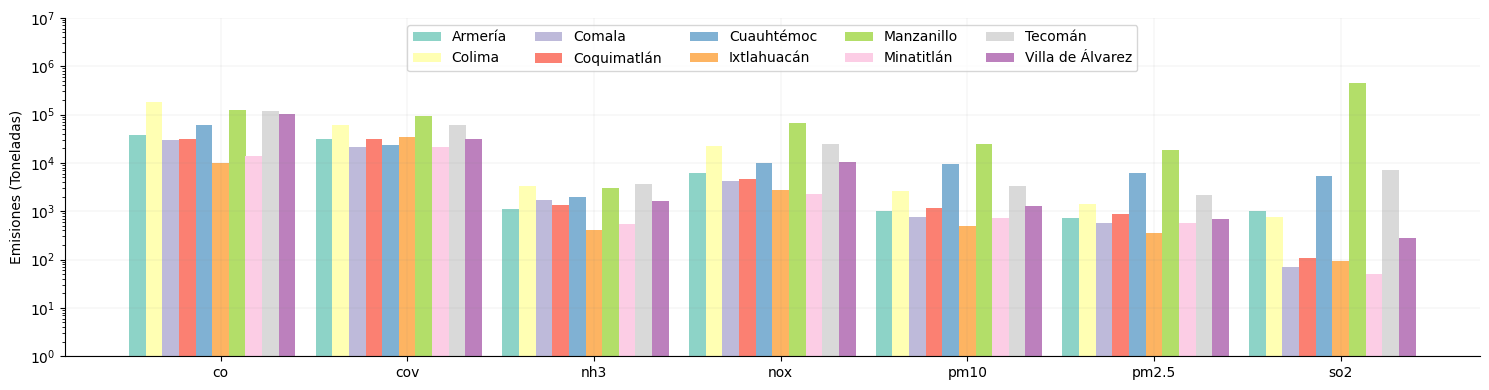

In [158]:
fig, ax = plt.subplots(figsize=(15, 4))

x = np.arange(len(total_mun_colima.index.unique()))
width = 0.09
labels = total_mun_colima.index

for xtick in x:
  # iterate over columns
  contador = -5
  for ytick, col in enumerate(total_mun_colima.columns):
    # set colormap to Set3

    rect = ax.bar(xtick + width / 1.01 * contador, total_mun_colima.loc[total_mun_colima.index.unique()[xtick], col], width, label=col,  color=plt.cm.Set3(ytick))
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
    
    
    # set logaritmic scale
    ax.set_yscale("log")
    
    # set ylimit as 0 to 1E7 (10 million) using log scale
    ax.set_ylim(1E0, 1E7) 
    
    contador += 1
    #ax.bar_label(rect, padding=3)
  if xtick == 0:
    ax.legend(ncol=5, loc="upper center")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel("Emisiones (Toneladas)")
ax.set_xticks(x, labels)

sns.despine()

# set a gray grid 
ax.grid(color='gray', linestyle='-', linewidth=0.1, alpha=0.7)

#ax.legend()
fig.tight_layout()

plt.savefig("img/emisiones_municipios_colima_FIG5.png", dpi=300)
plt.show()


In [159]:
total_mun_colima.loc[total_mun_colima.index.unique()[xtick], col]



285.26936839

## Fuentes

In [160]:
fuentes_mun.head()


,nom_ent,cve_ent,nom_mun,cve_mun,fuente,year,emision,emisiones
0,Aguascalientes,1,Aguascalientes,1.0,area,2008,pm10,1154.287483
1,Aguascalientes,1,Asientos,2.0,area,2008,pm10,261.230143
2,Aguascalientes,1,Calvillo,3.0,area,2008,pm10,268.989001
3,Aguascalientes,1,Cosio,4.0,area,2008,pm10,92.818156
4,Aguascalientes,1,Jesus Maria,5.0,area,2008,pm10,431.452577
